In [1]:
import pandas as pd

In [2]:
alu_prices = pd.read_csv("../data/Aluminium Historical Data.csv")
gdp = pd.read_csv("../data/world gdp monthly.csv")
usd_index = pd.read_csv("../data/us-dollar-index-historical-chart.csv")
alu_production = pd.read_csv("../data/aluminuim_production.csv")
energy_index = pd.read_csv("../data/Global price of Energy index.csv")
usd_cad = pd.read_csv("../data/usd_canadian_dollar.csv")
usd_rupee = pd.read_csv("../data/usd_indian_rupee.csv")
usd_ruble = pd.read_csv("../data/usd_russian_ruble.csv")
usd_yuan = pd.read_csv("../data/CNY=X.csv")
gas = pd.read_csv("./Data/NaturalGas.csv")
oil = pd.read_csv("./Data/IR14200.csv")
zinc = pd.read_csv("../data/data with all factorst1.0.csv")

In [3]:
nickel = zinc[["Unnamed: 0", "nickel_price"]]
zinc = zinc[["Unnamed: 0", "zinc_price"]]


In [4]:
alu_production = alu_production[["Date", "Africa", "North America", "South America", "Asia (ex China)", "Western & Central Europe", "Russia & Eastern Europe", "Oceania", "Gulf Cooperation Council", "China (Estimated)", "Estimated Unreported to IAI"]]
alu_production["Total"] = alu_production.sum(axis="columns", numeric_only=True)
alu_production["Date"] = pd.to_datetime(alu_production["Date"], format="%d/%m/%Y")
alu_production.rename(columns={"Total":"Production_total"}, inplace=True)
energy_index["DATE"] = pd.to_datetime(energy_index["DATE"], format="%Y-%m-%d")
energy_index.rename(columns={"DATE":"Date", "PNRGINDEXM":"Energy_index"}, inplace=True)
usd_rupee["Date"] = pd.to_datetime(usd_rupee["Date"], format="%Y-%m-%d")
usd_cad["Date"] = pd.to_datetime(usd_cad["Date"], format="%Y-%m-%d")
usd_ruble["Date"] = pd.to_datetime(usd_ruble["Date"], format="%Y-%m-%d")
usd_yuan["Date"] = pd.to_datetime(usd_yuan["Date"], format="%Y-%m-%d")
usd_rupee.rename(columns={"Open":"Open_usd_rupee"}, inplace=True)
usd_ruble.rename(columns={"Open":"Open_usd_ruble"}, inplace=True)
usd_yuan.rename(columns={"Open":"Open_usd_yuan"}, inplace=True)
usd_cad.rename(columns={"Open":"Open_usd_cad"}, inplace=True)

In [5]:

zinc.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
nickel.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
zinc["Date"] = pd.to_datetime(zinc["Date"])
nickel["Date"] = pd.to_datetime(nickel["Date"])

In [6]:
oil["DATE"] = pd.to_datetime(oil["DATE"])
oil.rename(columns={"DATE":"Date", "IR14200":"Oil"}, inplace=True)
gas["DATE"] = pd.to_datetime(gas["DATE"])
gas.rename(columns={"DATE":"Date", "PNGASEUUSDM":"Natural Gas"}, inplace=True)

In [7]:
gdp["Date"] = pd.to_datetime(gdp["Date"])

In [8]:
usd_index["Date"] = pd.to_datetime(usd_index["Date"], format="%d/%m/%Y")

In [9]:
alu_prices["Date"] = pd.to_datetime(alu_prices["Date"]) 

In [10]:
alu_prices.Price = alu_prices.Price.apply(lambda x: x.replace(",", ""))
alu_prices["Price"] = alu_prices["Price"].astype("float")

In [11]:
test_df = pd.merge(left=alu_prices[["Date", "Price"]], right=gdp, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=alu_production, on="Date", how="left")
test_df = pd.merge(left=test_df, right=energy_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_ruble[["Date", "Open_usd_ruble"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_rupee[["Date", "Open_usd_rupee"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_cad[["Date", "Open_usd_cad"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_yuan[["Date", "Open_usd_yuan"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=nickel, on="Date", how="left")
test_df = pd.merge(left=test_df, right=zinc, on="Date", how="left")
test_df = pd.merge(left=test_df, right=oil, on="Date", how="left")
test_df = pd.merge(left=test_df, right=gas, on="Date", how="left")

In [12]:
test_df = test_df.sort_values("Date")

In [13]:
test_df = test_df.fillna(method="ffill")

In [14]:
test_df.dropna(inplace=True)

In [15]:
import pandas as pd
from sklearn import linear_model

In [16]:
from mlxtend.preprocessing import minmax_scaling
test = minmax_scaling(test_df[["Price", "Energy_index", "USD_index", "Production_total"]], columns=["Price", "Energy_index", "USD_index", "Production_total"])
x = test[["Energy_index", "USD_index", "Production_total"]]
y = test["Price"]


In [17]:
x = test_df[["Energy_index", "USD_index", "Production_total"]]
y = test_df["Price"]

In [47]:
x = test_df[["GDP", "USD_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "zinc_price", "nickel_price"]]
y = test_df["Price"]

In [93]:
x = test_df[test_df.columns[2:]]
y = test_df["Price"]

In [98]:
regr = linear_model.LinearRegression()
regr.fit(x.iloc[:-90], y.iloc[:-90])



LinearRegression()

In [95]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4258.907276081429
Coefficients: 
 [-6.91639350e-01 -2.96232065e+00 -1.20254775e-02 -2.63477755e+00
 -2.56659465e+00  3.07337749e+00  5.30641730e+00 -7.54186262e+00
 -5.66009155e+00  4.49447199e+00 -1.48887310e-01  5.58656983e+00
 -1.03402544e-01  1.28795022e+00  9.05978544e+00 -2.80505072e+01
 -1.84311940e+03  7.00137107e+01 -1.71058095e-02  4.92912601e-02
  9.59150447e+00 -3.89129387e+00]


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\Uni\3. Semester\Projektseminar\tkseminar\tkseminar\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'\n\nplt.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")\nplt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")\nplt.ylabel("Aluminium Price in USD")\nplt.xlabel("Time")\nplt.legend(loc="upper left")\n\nticker_spacing = 1\nplt.set_xticks\nplt.xticks(np.arange(min(test_df["Date"].iloc[-90:],), max(test_df["Date"].iloc[-90:],)+1, 1.0))'

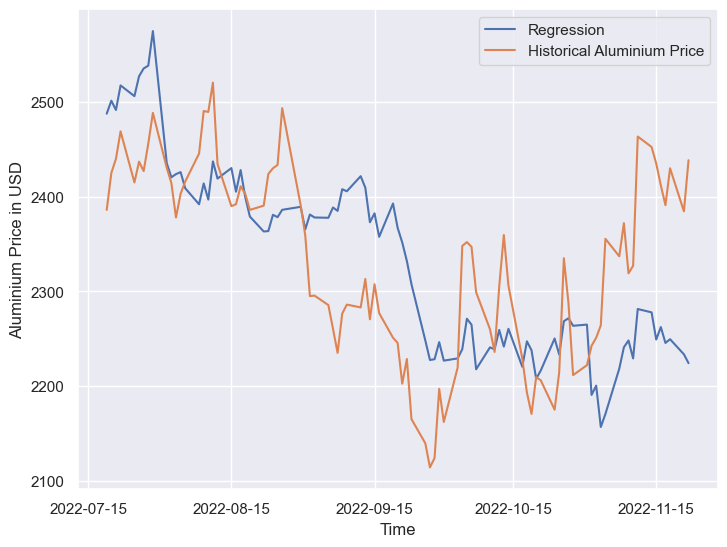

In [120]:
import numpy as np
import matplotlib.ticker as ticker
predictions = regr.predict(x.iloc[-90:].to_numpy())

sns.set_theme(style="darkgrid")

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
#plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("")
plt.plot()
"""

plt.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")
plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
plt.ylabel("Aluminium Price in USD")
plt.xlabel("Time")
plt.legend(loc="upper left")

ticker_spacing = 1
plt.set_xticks
plt.xticks(np.arange(min(test_df["Date"].iloc[-90:],), max(test_df["Date"].iloc[-90:],)+1, 1.0))"""



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [121]:
print(mean_absolute_error(y.iloc[-90:], predictions))
print(mean_squared_error(y[-90:], predictions))

79.11215579935713
8915.171323730818


C:\Users\rnoeske\AppData\Local\Temp\ipykernel_15280\291077241.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(mean_squared_error(y[-90:], predictions))


In [123]:
test_df["Price"].iloc[-90:].mean()

2331.6055555555554

In [124]:
mean_absolute_error(y.iloc[-90:], predictions) / test_df["Price"].iloc[-90:].mean()

0.0339303342329303

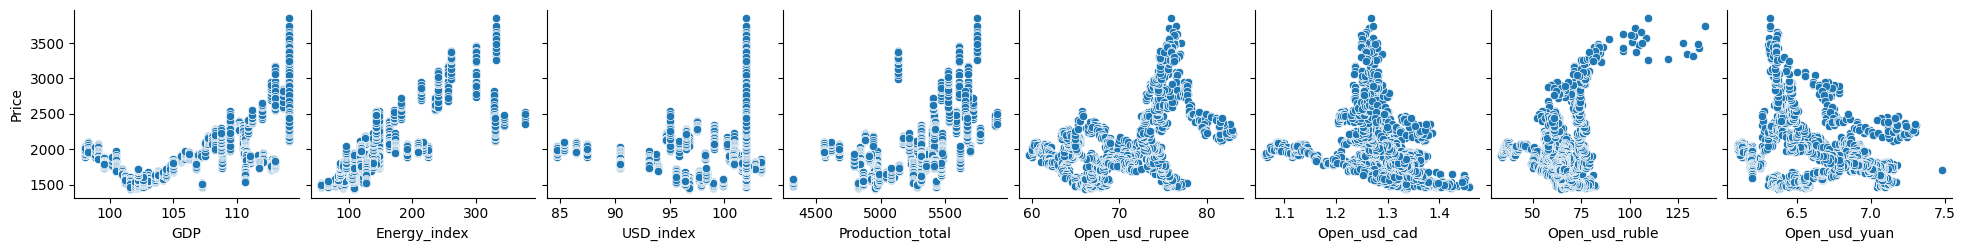

In [28]:
sns.pairplot(data=test_df, y_vars=["Price"], x_vars=["GDP", "Energy_index", "USD_index", "Production_total", "Open_usd_rupee",
"Open_usd_cad", "Open_usd_ruble", "Open_usd_yuan"])